# <span style="color:#6c42f5;font-size:9vw;font-weight:800;text-shadow:2px 2px 4px #aaa">Linear Regression</span>
# <span style="font-size:6vw;font-weight:800;text-shadow:2px 2px 10px #aaa">Two Days Faculty Development Programe</span>
## <span style="font-size:4vw;font-weight:800">Alok Pandey <br> Ashvini Jangid</span>
## <span style="font-size:4vw;font-weight:800"><a href="https://imjangid.xyz">ashvinijangid@gmail.com</a>

# Import libs

In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# Generate Data 

In [2]:
x, y = make_regression(100, noise=4, n_features=1)
X = x.reshape(-1,1)
Y = y.reshape(-1,1)

# Plotting

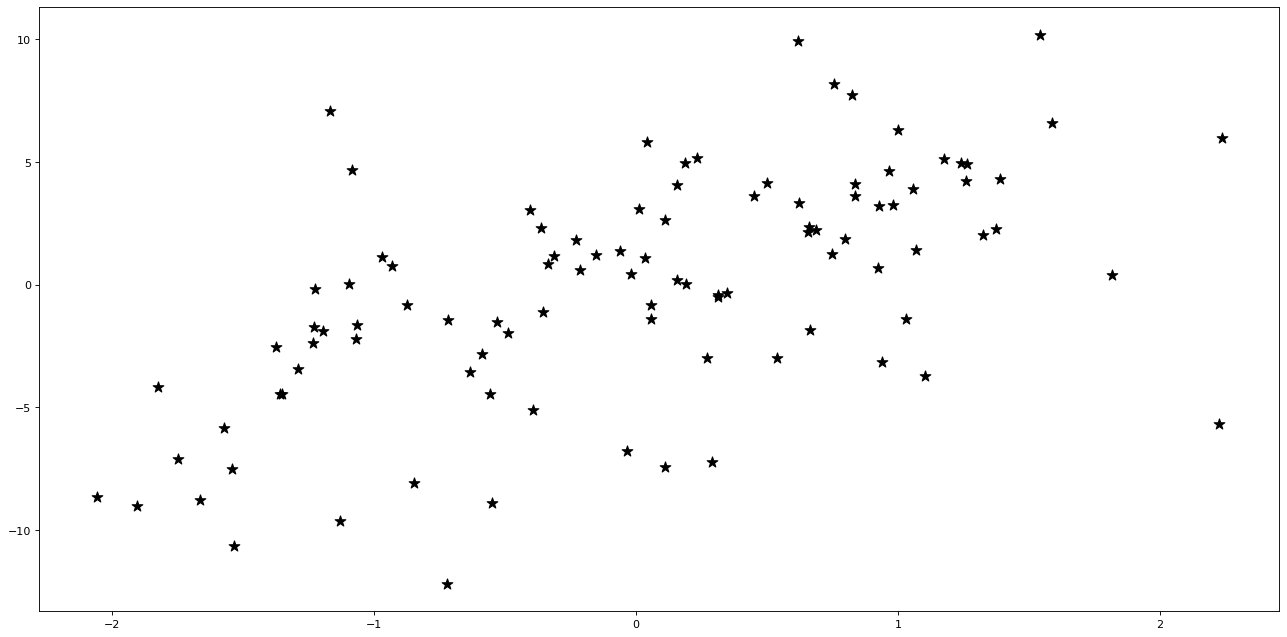

In [3]:
def plot(x, y, label=""):
    fig = plt.figure(figsize=(20, 10), dpi=80)
    ax = fig.add_subplot(111)
    ax.set_facecolor("white")
    ax.scatter(x, y, c="k", marker="*", s=100, label=label)
    return ax


plot(x, y)

# Regression

In [4]:
def calculate_weight(x, y, epoch):
    print("Iteration", "Error", "Bias", "\tWeight", sep="\t\t\t")
    x = np.insert(x, 0, 1, axis=1)
    θ = np.zeros(len(x[0]))
    m = y.size
    print_interval = 1

    lr = 0.01

    for i in range(epoch):

        h = (x @ θ).reshape(-1, 1)

        error = ((y - h)**2).mean()

        θ = θ - lr * (1 / m) * (x.T.dot(h - y)).reshape(-1)

        if not i % print_interval:
            print_interval *= 2
            print(str(i).center(10), error, θ[0], θ[1], sep="\t\t")

    print(str(i+1).center(10),error, θ[0], θ[1], sep="\t\t")
    return θ


def Predict(p, θ):
    x = np.insert(p, 0, 1, axis=0)
    return x.dot(θ)

## Training Model

In [5]:
weight = calculate_weight(X, Y, 1000)

Iteration			Error			Bias				Weight
    0     		22.164677511213654		-0.0012817534648968		0.02753582718081291
    2     		21.865236573640246		-0.003803039827391095		0.0817887175184685
    4     		21.577532949949454		-0.006269052098029635		0.13496794167778328
    8     		21.035515344212836		-0.011040032041596107		0.238189964489187
    16    		20.0732537349957		-0.019969837882788742		0.4326572312993753
    32    		18.55439890889709		-0.035617146573132086		0.7779109424284539
    64    		16.650292363326297		-0.05967401022105497		1.3228968503619614
   128    		15.116361553042239		-0.0882712931369997		2.0061891152841036
   256    		14.57094481249512		-0.10893473785028115		2.5567537503945523
   512    		14.525464551713853		-0.11476331693824478		2.7525876966454432
   1000   		14.525190357592383		-0.11502890616941641		2.768899845182242


## Predecting Value

In [6]:
y_cap = [Predict(i, weight) for i in X]

## Plotting The Result

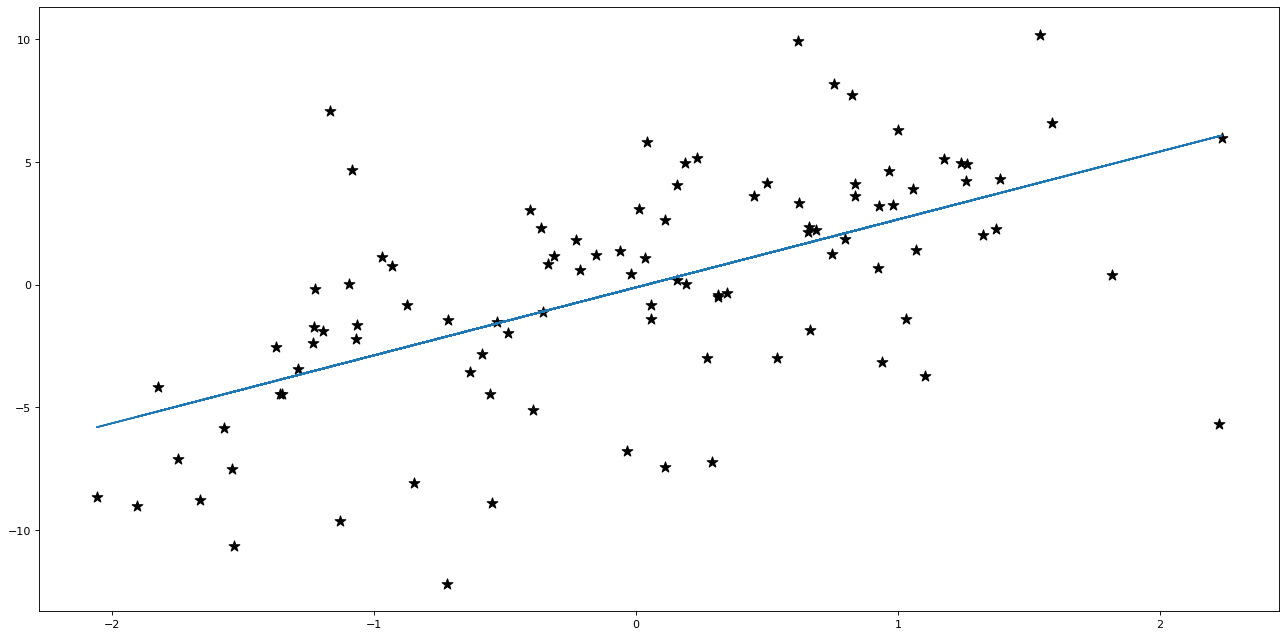

In [7]:
ax = plot(X, Y)
ax.plot(X,y_cap)

In [8]:
Predict([1], weight)

2.6538709390128257